# QSAR Model Building of Zika Virus Inhibitors

Jesse Maki

------

Quantitative structure-activity relationship (QSAR) modeling is pivotal in antiviral research and development. By correlating chemical structures to antiviral activities, QSAR can forecast the potential efficacy of a compound against specific viruses without intensive laboratory evaluations. This computational strategy has been instrumental in devising potential therapeutic agents for various viruses, including the Zika virus, a major public health concern in recent years.

Zika virus inhibitors aim to curtail the virus's replication and spread within the host organism. QSAR studies on Zika have identified specific chemical features that lead to potent inhibition against the virus. Guided by these findings, researchers have been able to design new inhibitors with enhanced specificity and antiviral properties. While initial QSAR models focused on compounds closely resembling known antivirals, more recent investigations have branched out, studying a variety of chemical structures and their effects on Zika virus inhibition. Attributes such as fat-solubility, hydrogen bonding, and molecule size/flexibility play recurring roles in these QSAR models. The predictive models derived from QSAR studies have fast-tracked the discovery of Zika inhibitors by forecasting their inhibitory potential, reducing the necessity for exhaustive screenings, and shedding light on intricate structure-function relationships.

For information about data acqustiton please refer to the python scripts

### Read in Data

In [84]:
import pandas as pd

In [85]:
dataset = pd.read_csv('Data/zika_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL603830,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.35
1,CHEMBL430893,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.87
2,CHEMBL63,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.11
3,CHEMBL4214820,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.59
4,CHEMBL325795,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,CHEMBL5203413,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2271,CHEMBL5179009,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2272,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2273,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [86]:
X = dataset.drop(['pIC50','Name'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2271,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2272,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2273,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
Y = dataset.iloc[:,-1]
Y

0      7.35
1      6.87
2      7.11
3      7.59
4      6.11
       ... 
2270    NaN
2271    NaN
2272    NaN
2273    NaN
2274    NaN
Name: pIC50, Length: 2275, dtype: float64

### Remove Low Variance Features

In [88]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,0,1,0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,1,1,1,1,1,1,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
2271,1,1,1,1,1,1,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
2272,1,1,1,1,0,1,1,0,0,1,...,1,1,0,1,1,0,1,0,0,0
2273,0,0,1,1,0,1,1,0,0,1,...,1,1,0,1,1,0,1,0,0,0


In [89]:
X.to_csv('descriptor_list.csv', index = False)

### Random Forest Regression Model

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=500, random_state=42)

# Check and replace Inf/NaN values in X
if np.any(np.isinf(X) | np.isnan(X)):
    X = np.where(np.isinf(X), np.nan, X)
    X = np.nan_to_num(X, nan=np.nanmean(X))

# Check and replace Inf/NaN values in Y
if np.any(np.isinf(Y) | np.isnan(Y)):
    Y = np.where(np.isinf(Y), np.nan, Y)
    Y = np.nan_to_num(Y, nan=np.nanmean(Y))

# Fit the model and score
model.fit(X, Y)
r2 = model.score(X, Y)
print(r2)

0.7599892996315851


### Model Prediction

In [94]:
Y_pred = model.predict(X)
Y_pred

array([6.99692291, 6.69882965, 6.69882965, ..., 6.04586832, 6.26615084,
       6.06256745])

### Model Performance

In [95]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.05
Coefficient of determination (R^2): 0.76


### Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [96]:
import matplotlib.pyplot as plt
import numpy as np

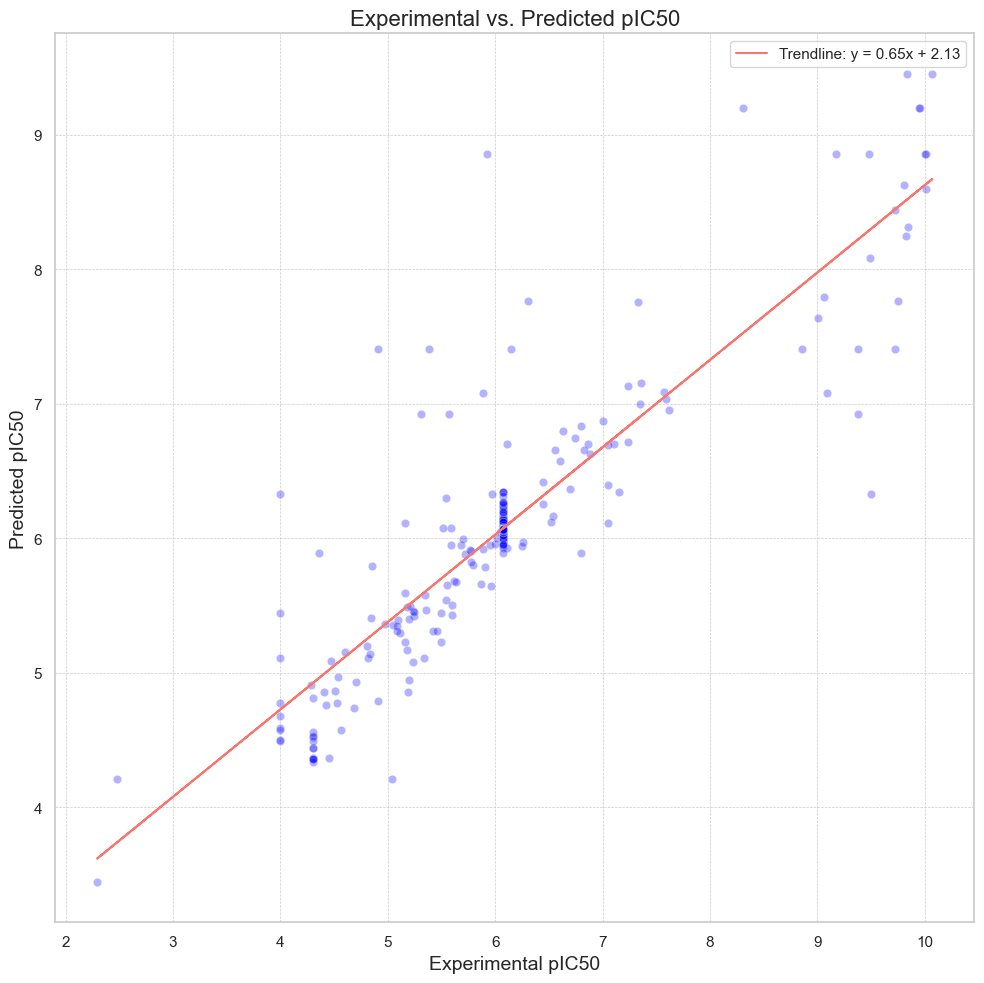

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Scatter plot with blue dots
plt.scatter(x=Y, y=Y_pred, c="#0000FF", alpha=0.3, edgecolors="w", linewidth=0.5)

# Trendline
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y, p(Y), "#F8766D", label=f"Trendline: y = {z[0]:.2f}x + {z[1]:.2f}")

# Set title and labels
plt.title('Experimental vs. Predicted pIC50', fontsize=16)
plt.xlabel('Experimental pIC50', fontsize=14)
plt.ylabel('Predicted pIC50', fontsize=14)

# Enhancements
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [98]:
import pickle
pickle.dump(model, open('zika_model.pkl', 'wb'))